# Pytorch-梯度下降參數更新法

我們先看一下最簡單的感知機神經網路(Perceptron)架構 (此架構基本上就回歸方程式)

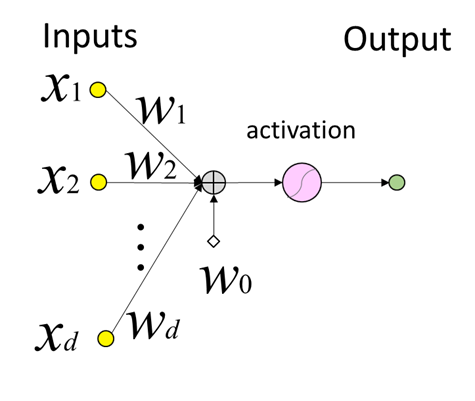

求解方式是利用倒傳遞(back-propagation)方式來更新"權重"。<br>
權重: $w_0, w_1, ..., w_d$

倒傳遞用的核心就是利用梯度來更新權重。<br>

><font size=3>本課程將解說如何在Pytorch利用梯度(Gradient)求參數的最佳解。</font><br>
    
<font size=5>梯度下降法:</font><br>
$$x^{(t+1)}=x^{(t)}-\alpha \times \nabla{f(x^{(t)})}$$
$\alpha$: 學習率<br>
$\nabla{f(x^{(t)})}$: 當$x^{(t)}在f(x^{(t)})$的梯度<br>
梯度有方向性，梯度向量會往極大值的方向前進，所以往梯度的反方向走基本上可以找到極小值的近似解。

<font size=4>範例1: </font>
$$ f(x) = x^2 -10 \times x + 1 $$
求$f(x)$的最小值?
1. 因為此方程式簡單，可以直接利用微分=0找到答案。
2. 也可以利用梯度下降法(Gradient Descent)求得近似解。

ANS1:
$$f'(x) = \frac{\partial{f(x)}}{\partial{x}} = 2x-10=0 \Rightarrow x = 5$$
$$f''(x) = \frac{\partial{f'(x)}}{\partial{x}} = 2 > 0$$
因此close-form找到$x=5$有$f(x)$最小值-24。<br>

ANS2:
$$x^{(t+1)}=x^{(t)}-\alpha \times \nabla{f(x^{(t)})}$$
假設$x^{(0)}=10$，學習率$\alpha$預設為0.1。<br>
$t=1$
$$x^{(1)}=x^{(0)}-0.1 \times (2x^{(0)}-10)$$
$$\Rightarrow x^{(1)} = 10 - 0.1 \times (2\times 10-10)$$
$$\Rightarrow x^{(1)} = 10 - 1 = 9 $$
$t=2$
$$x^{(2)}=x^{(1)}-0.1 \times (2x^{(1)}-10)$$
$$\Rightarrow x^{(2)} = 9 - 0.1 \times (2\times 9-10)$$
$$\Rightarrow x^{(2)} = 9 - 0.8 = 8.2 $$
....................

我們用Pytorch內的微分函數直接求梯度下降法給讀者看。<br>
在Pytorch中只需要將要求解的參數設定為torch的tensor <br>
並且將requires_grad設定為True (```requires_grad=True```)<br>
呈上例，參數是$x$，我們將$x$設定為需求梯度的參數，如下<br>
```
x = torch.tensor(x, requires_grad=True)
```
將$x$設定為需求梯度的參數後，可以將參數$x$帶入目標函數$y=f(x)$內，然後利用
```
y.backward()
```
得到每個參數的梯度，在程式利用```x.grad```可以看到梯度值。<br>

我們設定跟範例一樣的參數
然後更新50次，也就是$t=50$
可以看到
$$x^{(50)} = 5.0001 $$


## 梯度下降更新 流程

定義 loss Function -> 給初始值 -> 計算梯度 -> 更新參數 -> 重複直到收斂 

In [1]:
import numpy as np
import torch
# simple gradient
# y = x**2 -10*x+1
def f(x):
    return x**2 -10*x+1

x = np.array([10.0])
x = torch.tensor(x, requires_grad=True)

print(x.grad)

y = f(x)
y.backward() 

print(x.grad)



None
tensor([10.], dtype=torch.float64)


## 範例1 -探討疊代次數對梯度值的影響

In [10]:
import numpy as np
import torch
# simple gradient
# y = x**2 -10*x+1

# 定義 loss function
def f(x):
    return x**2 -10*x+1

# 初始化參數 x
x = np.array([10.0])
x = torch.tensor(x, requires_grad=True)


print('initial x={}'.format(x))
for i in range(50): 

    y = f(x)

    y.backward() # 計算梯度
    print('*'*10)
    print(x.data)
    print('第{}次梯度:{}'.format(i+1, x.grad))

    x.data = x.data -0.1*x.grad # 更新參數 x 
    print('第{}次更新後結果:{}'.format(i+1, x.data))

    x.grad.zero_() # 清空梯度，準備進行下一輪更梯度更新



initial x=tensor([10.], dtype=torch.float64, requires_grad=True)
**********
tensor([10.], dtype=torch.float64)
第1次梯度:tensor([10.], dtype=torch.float64)
第1次更新後結果:tensor([9.], dtype=torch.float64)
**********
tensor([9.], dtype=torch.float64)
第2次梯度:tensor([8.], dtype=torch.float64)
第2次更新後結果:tensor([8.2000], dtype=torch.float64)
**********
tensor([8.2000], dtype=torch.float64)
第3次梯度:tensor([6.4000], dtype=torch.float64)
第3次更新後結果:tensor([7.5600], dtype=torch.float64)
**********
tensor([7.5600], dtype=torch.float64)
第4次梯度:tensor([5.1200], dtype=torch.float64)
第4次更新後結果:tensor([7.0480], dtype=torch.float64)
**********
tensor([7.0480], dtype=torch.float64)
第5次梯度:tensor([4.0960], dtype=torch.float64)
第5次更新後結果:tensor([6.6384], dtype=torch.float64)
**********
tensor([6.6384], dtype=torch.float64)
第6次梯度:tensor([3.2768], dtype=torch.float64)
第6次更新後結果:tensor([6.3107], dtype=torch.float64)
**********
tensor([6.3107], dtype=torch.float64)
第7次梯度:tensor([2.6214], dtype=torch.float64)
第7次更新後結果:tensor([6.0

## 梯度更新視覺化

下面我們利用$x^{(0)}=-20$，學習率$\alpha$為0.1的方式建立出可視覺化的梯度和更新解給大家看。<br>
紅色星: 更新解 ($x^{(t)}$)<br>
藍色線: 梯度 ($\nabla{f(x^{(t)})}$)<br> 


In [29]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the function for which we want to find the minimum
def f(x):
    return x**2 - 10*x + 1

# Generate a range of x values for plotting the function
x_range = np.linspace(-10, 20, 100)
y_range = f(x_range)

# Initialize x as a PyTorch tensor, with gradient tracking
x = torch.tensor([-20.0], requires_grad=True)

# Learning rate for the gradient descent
lr = 0.1

# Create a matplotlib figure for the animation
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

# List to hold the frames of the animation
ims = []

for i in range(50):
    # Compute the function value and gradients
    y = f(x)
    y.backward()
    
    # Update x using gradient descent
    with torch.no_grad():  # Temporarily set all the requires_grad flag to false
        grad = x.grad.item()  # Get the gradient as a Python float
        x -= lr * x.grad

    # im=plt.plot(x_range, y_range,'k-', linewidth=5,)
    # im+=plt.plot(x.data, f(x.data),'r*',markersize=20)
    # im+=plt.plot([5, step+5],[50, 50],'b-', linewidth=5,)

    # Prepare the frame for the current step of gradient descent
    im = ax.plot(x_range, y_range, 'k-', linewidth=2)
    point, = ax.plot(x.item(), f(x).item(), 'r*', markersize=10)
    im += [point]
    
    # Add an arrow to show the gradient direction; note the negative sign to indicate descent
    arrow = ax.arrow(x.item(), f(x).item(), -lr*grad, 0, head_width=0.5, head_length=0.5, fc='blue', ec='blue')
    im += [arrow]

    plt.xlim([-10,20])
    plt.ylim([-30,200])
    plt.title('f(x)=$x^2$-10x+1')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    # Add the frame to the list of frames
    ims.append(im)
    
    # Zero the gradients for the next step
    x.grad.zero_()

# Create the animation
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)

# Save the animation

ani.save("grad_descent_with_gradient_direction.gif", writer='pillow')

plt.close(fig)  # Close the figure to prevent it from displaying in the notebook

print('Animation created and saved with gradient direction.')


Animation created and saved with gradient direction.


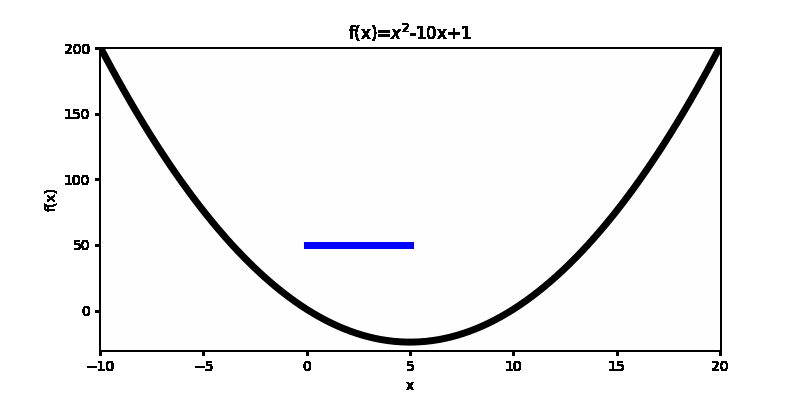

## 範例2 -探討不同學習率對梯度值的影響
$ f(x) = x^4 -50x^3 -x + 1 $

初始值$x^{(0)}=-25$ <br>
這邊我們觀察學習率為0.00001和0.0002在梯度下降求解的差異。


In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# simple gradient
def f(x):
    return x**4 -50*x**3-x+1

x_range = np.linspace(-30,60,100)
y_range = f(x_range)
for lr in [0.00001, 0.0002]:
    x = np.array([-25.0])
    x = torch.tensor(x, requires_grad=True)
    print('lr:{}, initial x={}'.format(lr, x))
    fig = plt.figure(figsize=(20, 10), dpi=100)
    ims = []
    for i in range(50):
        y = f(x)
        y.backward() 
        x.data = x.data -lr*x.grad
        step = lr*np.array(x.grad.detach_())
        if i%1==0:
            print('iter:{}: x*:{}, gard:{}'.format(i,x.data.numpy(), step))

        im=plt.plot(x_range, y_range,'k-', linewidth=5,)
        im+=plt.plot(x.data, f(x.data),'r*',markersize=20)
        plt.title('f(x)=$x^4-15x^3-x+1$')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        ims.append(im)

        x.grad.zero_()
    ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=100)
    ani.save("grad_simple_v2_lr({}).gif".format(lr),writer='pillow')

    plt.close()
    print('Done')




lr:1e-05, initial x=tensor([-25.], dtype=torch.float64, requires_grad=True)
iter:0: x*:[-23.43749], gard:[-1.56251]
iter:1: x*:[-22.09852262], gard:[-1.33896738]
iter:2: x*:[-20.93432771], gard:[-1.16419491]
iter:3: x*:[-19.90997312], gard:[-1.02435459]
iter:4: x*:[-18.99965444], gard:[-0.91031868]
iter:5: x*:[-18.18381911], gard:[-0.81583533]
iter:6: x*:[-17.44733207], gard:[-0.73648704]
iter:7: x*:[-16.7782627], gard:[-0.66906937]
iter:8: x*:[-16.16705754], gard:[-0.61120516]
iter:9: x*:[-15.60596114], gard:[-0.5610964]
iter:10: x*:[-15.08860131], gard:[-0.51735983]
iter:11: x*:[-14.60968608], gard:[-0.47891523]
iter:12: x*:[-14.16477832], gard:[-0.44490776]
iter:13: x*:[-13.75012553], gard:[-0.4146528]
iter:14: x*:[-13.36252938], gard:[-0.38759615]
iter:15: x*:[-12.99924456], gard:[-0.36328482]
iter:16: x*:[-12.65789934], gard:[-0.34134522]
iter:17: x*:[-12.33643255], gard:[-0.32146679]
iter:18: x*:[-12.03304313], gard:[-0.30338942]
iter:19: x*:[-11.74614938], gard:[-0.28689375]
ite

## LR = 0.00001

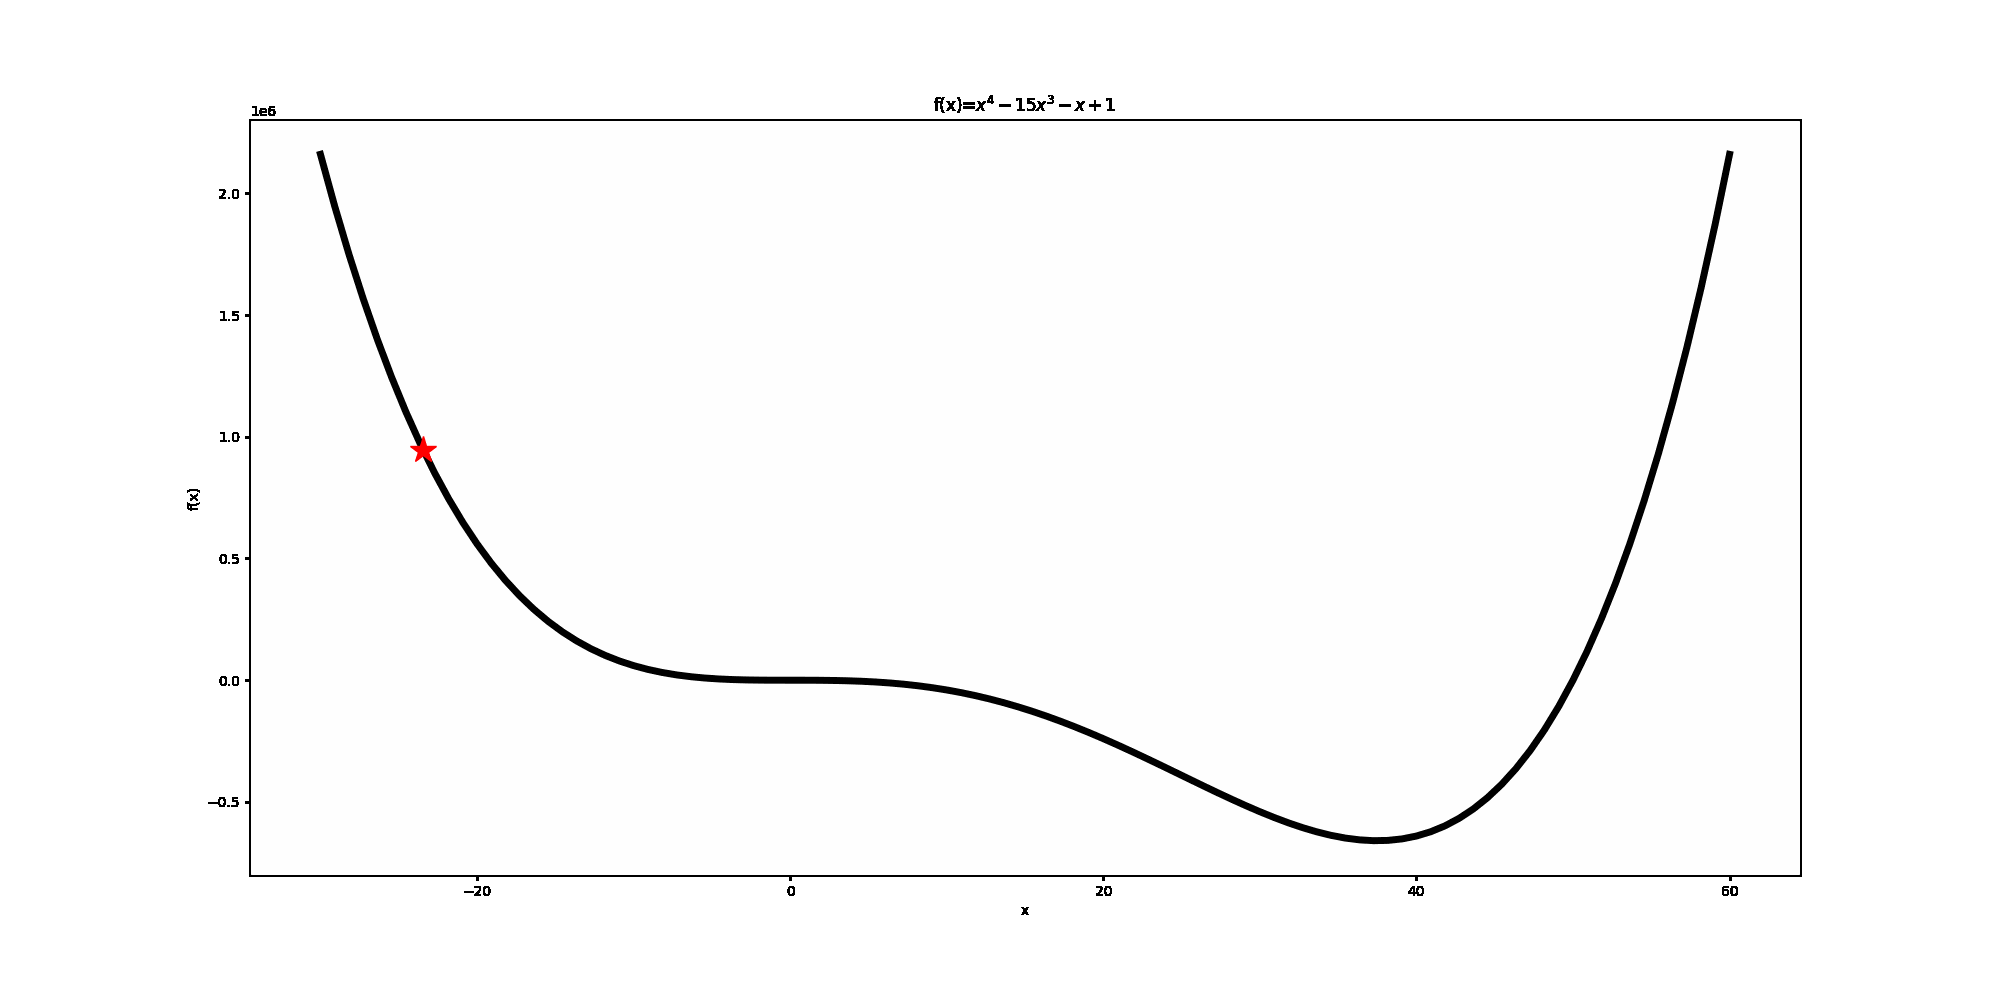




## LR = 0.0002
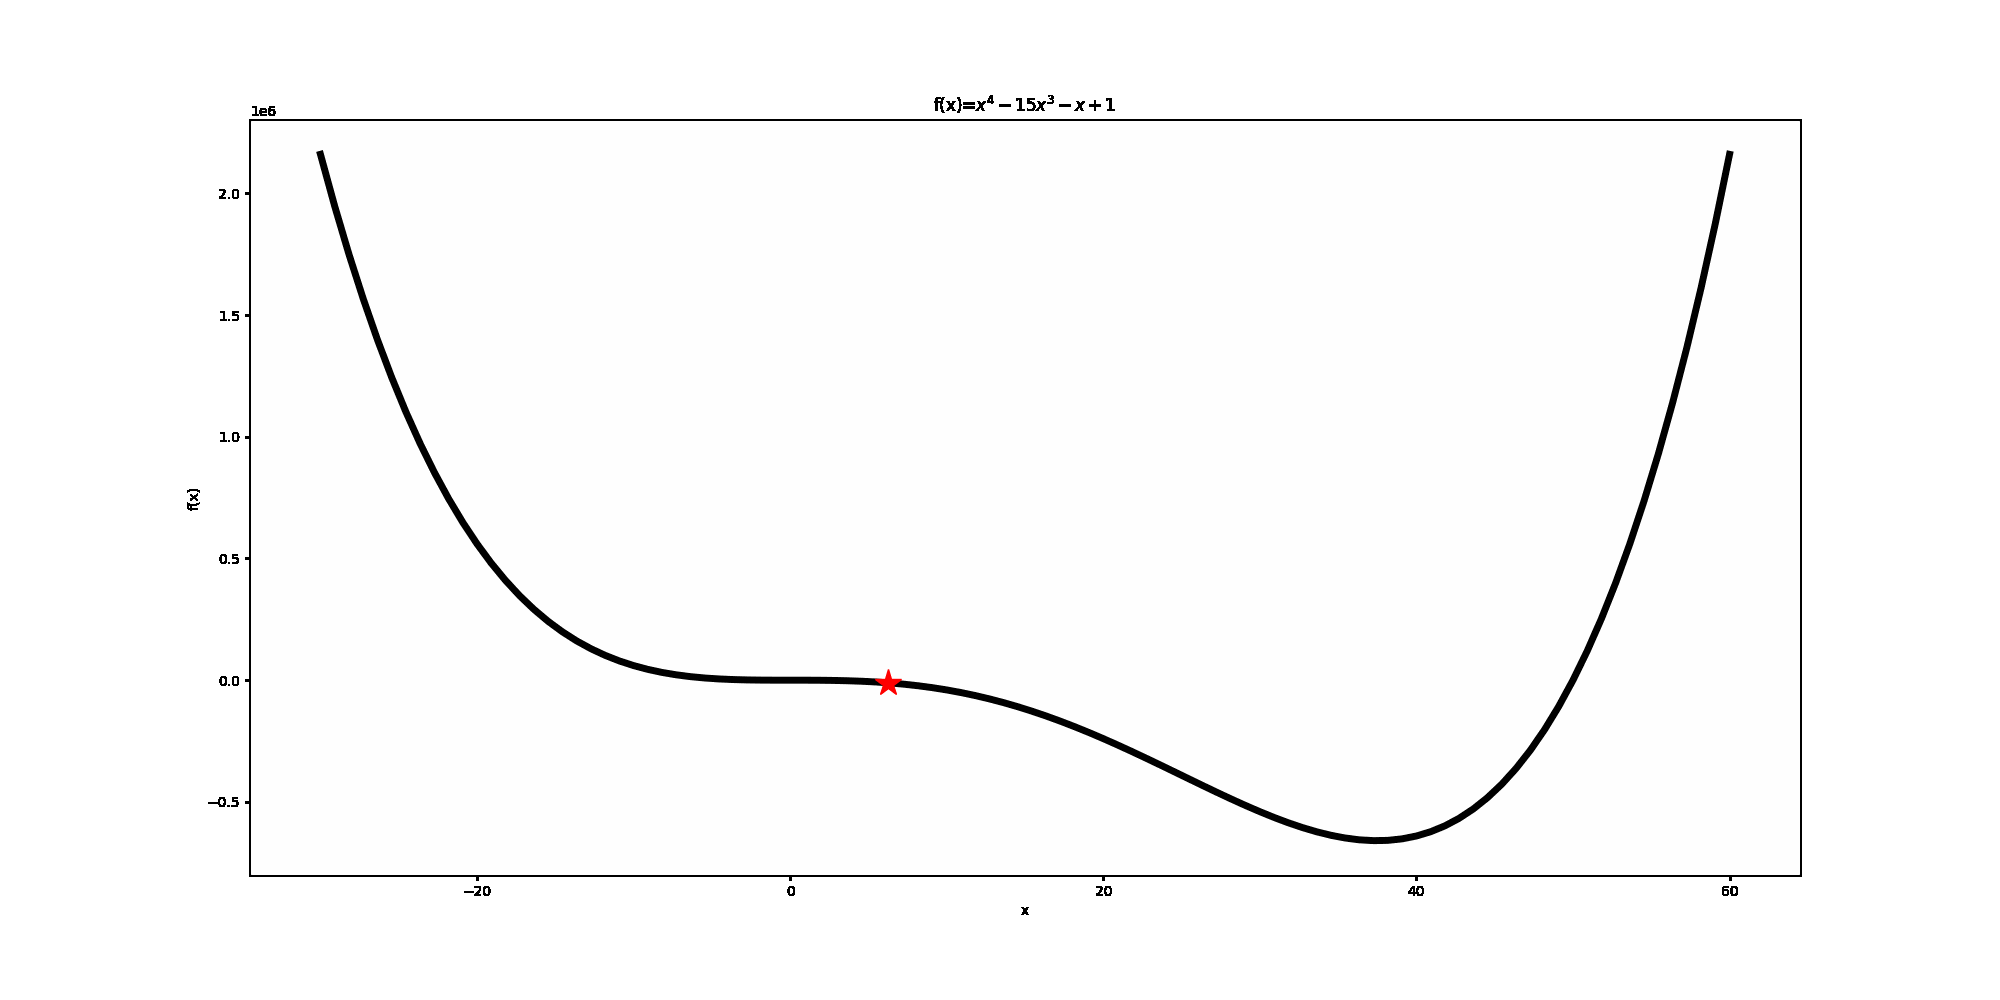

由上解，大家應該可以發現學習率0.0002可以找到比0.00001來好的解。<br>
因此學習率的設定可以找到更好的解，但有沒有辦法在學習率上不要設定太多也可以找到好的解，那就需要去研究Gradient相關的議題。<br>
本文章不多介紹。<br>

有稍微學習過pytorch的讀者可能會覺得這跟我自學的model學習方式不太一樣。<br>
標準寫法都是<br>
宣告最佳化器，然後將梯度設定為0，計算loss函數，在做backward求梯度，然後再更新，類似下面的寫法
```
opt = optim.SGD([x], momentum=0, lr=0.1)
opt.zero_grad()
y=model(x)
l = loss(y)  
l.backward()
opt.step()
```
我們這邊寫一份跟常見一樣的寫法來求
$$f(x)=x^2-10x+1$$

In [2]:
import numpy as np
import torch

# simple gradient
# y = x**2 -10*x+1
def f(x):
    return x**2 -10*x+1
x = np.array([10.0],dtype=np.float32)
x = torch.tensor(x, requires_grad=True)
print('initial x={}'.format(x))
for i in range(10): 
    y = f(x)
    y.backward() 
    x.data = x.data -0.1*x.grad
    print('第{}次梯度:{}, x*:{}'.format(i+1, x.grad, x.data))
    x.grad.zero_()
    
print('-'*50)
# simple gradient by pytorch optim.SGD
# y = x**2 -10*x+1
from torch import optim
def loss(x):
    return x**2 -10*x+1
x = np.array([10.0],dtype=np.float32)
x = torch.tensor(x, requires_grad=True)
opt_simple = optim.SGD([x], momentum=0, lr=0.1)
print('initial x={}'.format(x))
for i in range(10): 
    opt_simple.zero_grad()
    l = loss(x)  
    l.backward()
    opt_simple.step()
    print('第{}次梯度:{}, x*:{}'.format(i+1, x.grad, x.data))

initial x=tensor([10.], requires_grad=True)
第1次梯度:tensor([10.]), x*:tensor([9.])
第2次梯度:tensor([8.]), x*:tensor([8.2000])
第3次梯度:tensor([6.4000]), x*:tensor([7.5600])
第4次梯度:tensor([5.1200]), x*:tensor([7.0480])
第5次梯度:tensor([4.0960]), x*:tensor([6.6384])
第6次梯度:tensor([3.2768]), x*:tensor([6.3107])
第7次梯度:tensor([2.6214]), x*:tensor([6.0486])
第8次梯度:tensor([2.0972]), x*:tensor([5.8389])
第9次梯度:tensor([1.6777]), x*:tensor([5.6711])
第10次梯度:tensor([1.3422]), x*:tensor([5.5369])
--------------------------------------------------
initial x=tensor([10.], requires_grad=True)
第1次梯度:tensor([10.]), x*:tensor([9.])
第2次梯度:tensor([8.]), x*:tensor([8.2000])
第3次梯度:tensor([6.4000]), x*:tensor([7.5600])
第4次梯度:tensor([5.1200]), x*:tensor([7.0480])
第5次梯度:tensor([4.0960]), x*:tensor([6.6384])
第6次梯度:tensor([3.2768]), x*:tensor([6.3107])
第7次梯度:tensor([2.6214]), x*:tensor([6.0486])
第8次梯度:tensor([2.0972]), x*:tensor([5.8389])
第9次梯度:tensor([1.6777]), x*:tensor([5.6711])
第10次梯度:tensor([1.3422]), x*:tensor([5.5369])


---------------------------------------------
# 前一段訓練程式看到衍伸函數
```
optimizer.zero_grad()
```
這功能在幹嘛? (見下範例程式碼)
訓練程式會看到將梯度歸0。

```
opt = optim.SGD([x], momentum=0, lr=0.1)
opt.zero_grad()
y=model(x)
l = loss(y)  
l.backward()
opt.step()
```


## optimizer.zero_grad()
<font size=4 color=red> **此函數是用在將梯度歸0。** </font><br>

<font size=4 color=red> **- 什麼叫梯度歸0?** </font>

<font size=3 > 在每個batch在模型inference中，模型會將梯度同時也算出來，也就是此段程式碼 (output = model(data))

如果在pytorch不使用zero_grad()，也就是每次模型更新不歸0會發生什麼事情<br>
    
範例:  $y=x^2 → \frac{{\rm d}y}{{\rm d}x}=\frac{{\rm d}x^2 }{{\rm d}x}\ = 2x $<br>


In [4]:
import numpy as np
import torch
x = np.array([1.0,2.0,3.0])
x = torch.tensor(x, requires_grad=True)
print('x:{}'.format(x))
for i in range(5): 
    print('-------')
    print('x:{}'.format(x.data))
    y = x**2
    y.sum().backward()
    # y.mean().backward()
    print('第{}次梯度:{}'.format(i+1, x.grad.data))

x:tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)
-------
x:tensor([1., 2., 3.], dtype=torch.float64)
第1次梯度:tensor([2., 4., 6.], dtype=torch.float64)
-------
x:tensor([1., 2., 3.], dtype=torch.float64)
第2次梯度:tensor([ 4.,  8., 12.], dtype=torch.float64)
-------
x:tensor([1., 2., 3.], dtype=torch.float64)
第3次梯度:tensor([ 6., 12., 18.], dtype=torch.float64)
-------
x:tensor([1., 2., 3.], dtype=torch.float64)
第4次梯度:tensor([ 8., 16., 24.], dtype=torch.float64)
-------
x:tensor([1., 2., 3.], dtype=torch.float64)
第5次梯度:tensor([10., 20., 30.], dtype=torch.float64)


<font size=3> 
    所以可以發現如果我們沒有清掉梯度，在backward()部分梯度會將舊的梯度一直累加上去<br>
    所以需要將參數自行歸0。

In [2]:
# simple gradient
a = np.array([1.0, 2.0, 3.0])
a = torch.tensor(a, requires_grad=True)
for i in range(5): 
    c = a * a 
    out = c.sum()
    out.backward()
    print('*'*10)
    print('input:{}'.format(a.data))
    print('第{}次梯度:{}'.format(i+1, a.grad.data))
    a.grad.detach_()
    a.grad.zero_()


**********
input:tensor([1., 2., 3.], dtype=torch.float64)
第1次梯度:tensor([2., 4., 6.], dtype=torch.float64)
**********
input:tensor([1., 2., 3.], dtype=torch.float64)
第2次梯度:tensor([2., 4., 6.], dtype=torch.float64)
**********
input:tensor([1., 2., 3.], dtype=torch.float64)
第3次梯度:tensor([2., 4., 6.], dtype=torch.float64)
**********
input:tensor([1., 2., 3.], dtype=torch.float64)
第4次梯度:tensor([2., 4., 6.], dtype=torch.float64)
**********
input:tensor([1., 2., 3.], dtype=torch.float64)
第5次梯度:tensor([2., 4., 6.], dtype=torch.float64)


 ## <font color=blue> 梯度為歸0手寫範例
<font size=3>**梯度下降法**
<font size=3> \begin{gather*}
\theta^{(t+1)} = \theta^{(t)} - \eta \times f'(\theta^{(t)})
\end{gather*}
<font size=3> $f'(\theta)$為梯度，$\eta$為學習率(Learning rate)<br>
假設初始的$\theta^{(0)}$為10 <br>

1. 第一個batch的梯度$f'(\theta^{(0)})$為 2，$\eta$為1<br>
$$
\theta^{(1)} = \theta^{(0)} - \eta \times f'(\theta^{(0)}) = 10 - 1 \times 2 = 8
$$

  
2. 第二個batch的梯度$f'(\theta^{(1}))$為 1 <br>
如果梯度有歸0，則梯度更新則是
$$
\theta^{(2)} = \theta^{(1)} - \eta \times \color{red}{f'(\theta^{(1)})} = 8 - 1 \times 1 = 7
$$ 
如果梯度沒有歸0，則梯度會累加，更新方式則是
$$
\theta^{(2)} = \theta^{(1)} - \eta \times \color{red}{(f'(\theta^{(1)})+f'(\theta^{(0)}))} = 7 - 1 \times (1+2) = 4
$$
    
3. 第三個batch的梯度$f'(\theta^{(1}))$為 -1 <br>
如果梯度有歸0，則梯度更新則是
$$    
\theta^{(3)} = \theta^{(2)} - \eta \times \color{red}{f'(\theta^{(2)})} = 7 - 1 \times (-1) = 8
$$
如果梯度沒有歸0，則梯度會累加，更新方式則是
$$
\theta^{(3)} = \theta^{(2)} - \eta \times \color{red}{(f'(\theta^{(2)})+f'(\theta^{(1)})+f'(\theta^{(0)}))} = 4 - 1 \times (1+2-1) = 2
$$     
</font>   

Note:梯度不歸零不一定是用累積的方式，也能用平均的方式進行梯度融合。




本篇文章的出處: https://github.com/TommyHuang821/PytorchTutorial
